In [1]:
import MeCab

In [3]:
raw_file = 'C:/Users/ryoun/Downloads/wagahaiha_nekodearu.txt'
file = 'C:/Users/ryoun/Downloads/wagahaiha_nekodearu.txt.mecab'
tagger = MeCab.Tagger()

with open(raw_file, 'r', encoding='utf-8') as f1, \
                open(file, 'w', encoding='utf-8') as f2:
    for row in f1:
        f2.write(tagger.parse(row))

In [4]:
def read_mecab(file):
    results = []
    morphs = []
    with open(file, 'r', encoding='utf-8') as f:
        for row in f:
            if row == 'EOS\n':
                if len(morphs):
                    results.append(morphs)
                    morphs = []
            else:
                cols1 = row.split('\t')
                cols2 = cols1[1].split(',')
                morph = {'surface': cols1[0],
                          'base': cols2[6],
                          'pos': cols2[0],
                          'pos1': cols2[1],
                          }
                morphs.append(morph)
    if len(morphs):
        results.append(morphs)
        morphs = []
    return results

results = read_mecab(file)
results[:3]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]]

In [6]:
ans = set()
for morphs in results:
    for morph in morphs:
        if morph['pos'] == '動詞':
            ans.add(morph['surface'])

print('動詞の表層形の種類:{}'.format(len(ans)))
print('===10個表示===')
for v in list(ans)[:10]:
    print(v)

動詞の表層形の種類:3893
===10個表示===
動かす
ひっくり返し
片付ける
似合わ
跳ね返る
沈む
浮き
持ち上がっ
笑う
はおり


In [7]:
ans = set()
for morphs in results:
    for morph in morphs:
        if morph['pos'] == '動詞':
            ans.add(morph['base'])

print('動詞の基本形の種類:{}'.format(len(ans)))
print('====10個表示===')
for v in list(ans)[:10]:
    print(v)

動詞の基本形の種類:2300
====10個表示===
動かす
馴らす
片付ける
跳ね返る
沈む
固まる
笑う
明ける
やむをえる
縮む


In [9]:
ans = set()
for morphs in results:
    word = ''
    flg = 0
    for morph in morphs:
        if flg:
            if morph['pos'] == '名詞':
                ans.add(word + morph['surface'])
                flg = 0
                word = morph['surface']
            else:
                flg = 0
                word = ''
        elif morph['pos'] == '名詞':
            word = morph['surface']
        elif word and morph['surface'] == 'の':
            flg = 1
            word += 'の'
        else:
            word = ''
            continue

print('名詞句の種類:{}'.format(len(ans)))
print('===10個表示===')
for v in list(ans)[:10]:
    print(v)


名詞句の種類:4924
===10個表示===
越後獅子の鼻
無言の芝居
頭蓋骨の上
君の話
様の方
薄紫の衣服
君のため
大根の兄弟分
持主の迷惑
人の自覚


In [15]:
ans = set()
for morphs in results:
    word = []
    for morph in morphs:
        if morph['pos'] != '名詞':
            if len(word) > 1:
                ans.add(''.join(word))
            word = []
        else:
            word.append(morph['surface'])
    if len(word) > 1:
        ans.add(''.join(word))

print('名詞の連接の種類:{}'.format(len(ans)))
for v in list(ans):
    print(v)

名詞の連接の種類:4457
言語動作
残喘
袱紗包
末勢
得たる
三角主義
一二尺
癇癪持ち
マイナス一分刈
限り積極的方針
御苦労千万
羽織全盛
ワイスマン諸家
子さん
通り消極的
三十円
せんだって学校
楚辞
代り十文半
さそう
ぺたと顋
枯木寒巌
二丁目
十二個
空霊
自慢そう
奴め最後っ屁
乾屎
仏作
筋頭
婦人会
張り合
平均性理論
不思議そう
障害物
邵康節
敵中
手詰
せんだって細君
浅黄木綿
うそつき
一通り
妙答
羽織何点代価いくら
午飯
注文通り寒月君
猫食い
当人大分説
多角性
冥想
休養以外
当時巡査
八木独仙君
三番目
帽子屋
近所迷惑
粉韲
んざあ
主人以外
一大珍報
鼻子夫人
二本
一つ穴
一意戦闘
義捐金
戦闘線内
四寸角
おい君
黒眼
半月形
臥竜窟
やあ親方
七代目樽金
胃病患者
無事是貴人
普通の
意気銷沈
時聖堂
是非周旋
騒動中
此孔雀
工学士
神経性胃弱
無期徒刑
羅甸語
死竜
詐偽師
許さん
二三度瞬
両君能
二三尺
二切
まま無言
通り主人
面構
供心
埼玉生れ
新年匆々
帆木綿
大変空腹
候節
医者様
張札
リーダー専門
大詔煥発
裸体像
神秘的
一部隊
平生羅甸語
迷亭君
代り当人
君九年前
二三枚
僕なんざあ
銀さん
一生懸命餅
心元
形身
主人一人
珍譚
歓言愉色
焼打以上
うちどれ
珠作り
植木屋
これこれ
奥さんこれ
伝声
候得共是
両方共紛失
家族的生活
是非共眼
中学時代
錬金術以前
候処
梧前灯下
恃む
今時分人
我太刀
君大
山高帽
細君及雪江嬢
一種
——つまり自分
想像力
大分みんな
——なあに
何遍
朱泥
娘自身
戸迷
暫時中止
ガラス球
多々良さん
蝉取り
言草
齎ら
今一歩
ボーン
禅語
手伝
君子流
高輪泉岳寺
我々同族間
愉快そう
聟殿
段奉賀上候陳
手め
せんだってじゅう
喜多床
——奥さん
妾等
せんだって妙
たま拾
賦税
ゃらちゃらちゃらちゃら続け様
ふだん着
二寸
霊物
毎月二円
吾輩猫共
十本
雁鍋
万年
臭骸
大将隅
永久ダムダム弾
さっき座敷
嬢さん喰
一番利口
さまさ
みんな鎌倉あたり
沢庵石
人間中
自然両君
二個製造
頃吐月峰
功果
一列一体
三本
源ちゃん
今度限り
睡眠剤
真似ら
東京市
上是非文芸上
甲割
吾人戦勝国
診察場
乱暴猫
六十株
大間違
大小三個


In [22]:
from collections import Counter

words = []
for morphs in results:
    for morph in morphs:
        if morph['pos'] != '記号':
            words.append(morph['base'])

c = Counter(words)
ans = c.most_common()

for w in ans[:10]:
    print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5975)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


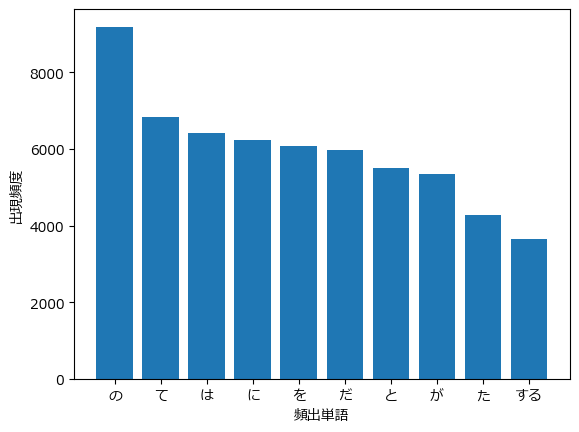

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Meiryo'

top10_words = [w[0] for w in ans[:10]]
top10_wors_count = [w[1] for w in ans[:10]]

fig, ax = plt.subplots()
ax.bar(top10_words, top10_wors_count)
ax.set_xlabel('頻出単語')
ax.set_ylabel('出現頻度')
plt.show()

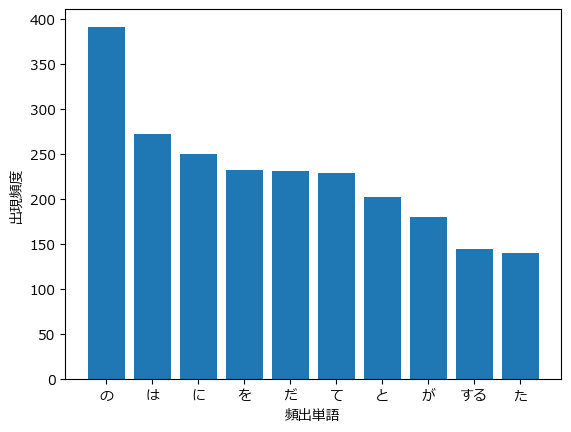

In [20]:
words = []
for morphs in results:
    if '猫' in [x['surface'] for x in morphs]:
        for morph in morphs:
            if morph['pos'] != '記号' and morph['surface'] != '猫':
                words.append(morph['base'])

c = Counter(words)
ans = c.most_common()

top10_words = [w[0] for w in ans[:10]]
top10_words_count = [w[1] for w in ans[:10]]

fig, ax = plt.subplots()
ax.bar(top10_words, top10_words_count)
ax.set_xlabel('頻出単語')
ax.set_ylabel('出現頻度')
plt.show()

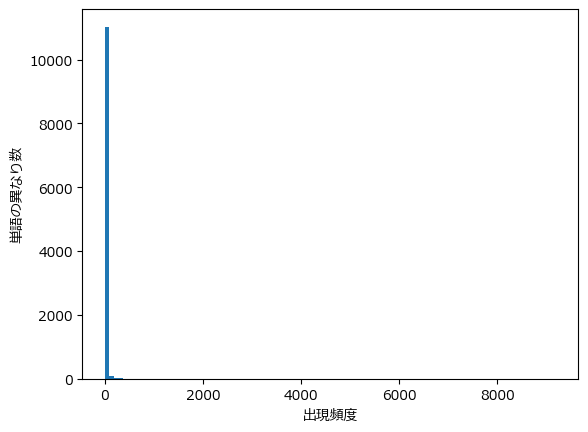

In [25]:
words = []
for morphs in results:
    for morph in morphs:
        if morph['pos'] != '記号':
            words.append(morph['base'])

c = Counter(words)
ans = c.values()

fig, ax = plt.subplots()
ax.hist(ans, bins=100)
ax.set_xlabel('出現頻度')
ax.set_ylabel('単語の異なり数')
plt.show()

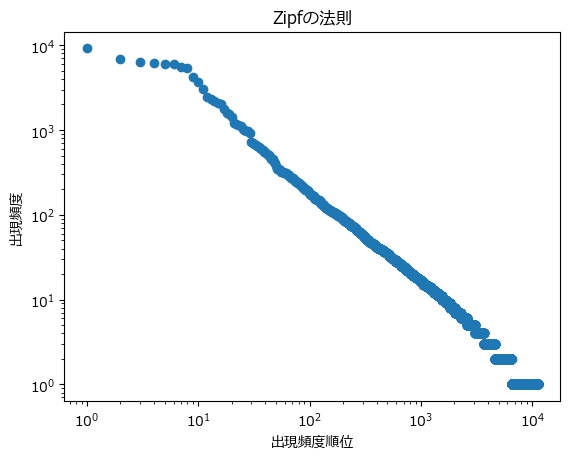

In [26]:
ans = sorted(list(ans), reverse=True)
order = [i + 1 for i in range(len(ans))]

fig, ax = plt.subplots()
ax.scatter(order, ans)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Zipfの法則')
ax.set_xlabel('出現頻度順位')
ax.set_ylabel('出現頻度')
plt.show()

In [27]:
import CaboCha
c = CaboCha.Parser()
s = "シートンの動物好き、動物に目と心を惹かれつくして飽きずに観察に我を忘れる姿は一種独特である。"
result = c.parseToString(s)
print(result)

ModuleNotFoundError: No module named 'CaboCha'